# NREFT Spectra

Here, we calculate the spectra for 11 different operators and a range of target nuclei.

In [1]:
from WIMpy import DMUtils as DMU

#We'll also import some useful libraries
import numpy as np
import matplotlib.pyplot as pl

import matplotlib as mpl

font = {'family' : 'sans-serif',
        'size'   : 16}

mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['xtick.minor.size'] = 3
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['ytick.minor.size'] = 3
mpl.rcParams['ytick.minor.width'] = 1
mpl.rc('font', **font)

from tqdm import tqdm

from matplotlib.ticker import MultipleLocator


### Target nuclei

Let's specify the target nuclei we're interested in...

In [5]:
targets = ["Xenon", "Argon", "Germanium", "C3F8"]

nuclei_Xe = ["Xe128", "Xe129", "Xe130", "Xe131", "Xe132", "Xe134", "Xe136"]
nuclei_Ar = ["Ar40",]
nuclei_C3F8 = ["C12", "Fluorine"]
nuclei_Ge = ["Ge70", "Ge72", "Ge73", "Ge74", "Ge76"]

nuclei_vals = dict(zip(targets, [nuclei_Xe, nuclei_Ar, nuclei_Ge, nuclei_C3F8]))

#Load in the list of nuclear spins, atomic masses and mass fractions
nuclei_list = np.loadtxt("../WIMpy/Nuclei.txt", usecols=(0,), dtype='string')
frac_list = np.loadtxt("../WIMpy/Nuclei.txt", usecols=(3,))

frac_vals = dict(zip(nuclei_list, frac_list))

### Calculating the recoil rate

Let's define a function for calculating the recoil spectrum for a given target:

In [6]:
E_list = np.linspace(0, 100, 100)
m_x = 50.0 #GeV

def calcSpectrum(target, operator):
    cp = np.zeros(11)
    cn = np.zeros(11)
    
    #Assume isoscalar (cp = cn) interactions
    cp[operator-1] = 1.0
    cn[operator-1] = 1.0
    
    dRdE = np.zeros_like(E_list)
    
    if (target == "C3F8"):
        #Weight by mass fractions of constituents
        dRdE = 0.1915*DMU.dRdE_NREFT(E_list, m_x, cp, cn, "C12")\
            + 0.8085*DMU.dRdE_NREFT(E_list, m_x, cp, cn, "Fluorine")
    
    else:
        nuclei = nuclei_vals[target]
        for nuc in nuclei:
             dRdE += frac_vals[nuc]*DMU.dRdE_NREFT(E_list, m_x, cp, cn, nuc)
        
    return dRdE

### Plotting a single recoil rate

Adding the recoil rate to a given plot:

In [7]:
def plotSpectrum(target, operator, ax, label, color):
    dRdE = calcSpectrum(target, operator)
    
    #Normalise to 1 event
    dRdE_norm = dRdE/np.trapz(dRdE,E_list)
    
    ax.plot(E_list, dRdE_norm, label=label, color=color, lw=1.5)

### Plotting the recoil rate for a given operator (and all targets)

In [8]:
def plotOperator(ax, operator, plotLegend=False):

    ax.set_title(r"Operator $\mathcal{O}_{" + str(operator) + "}$",fontsize=14)
    
    colors = ['r','b','g', 'c']
    
    for tar, col in zip(targets, colors):
        plotSpectrum(tar, operator, ax, label=tar, color=col)
    
    ax.set_xlabel(r'$E_R \,\,\mathrm{[keV]}$')
    ax.set_ylabel(r'$\mathrm{d}R/\mathrm{d}E_R \,\,\mathrm{[1/keV]}$')
    
    if (plotLegend):
        ax.legend(fancybox=True, fontsize=14)
    
    ax.yaxis.set_major_locator(MultipleLocator(0.01))
    ax.set_ylim(0, 0.06)

### Actually doing the plotting...

/usr/local/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


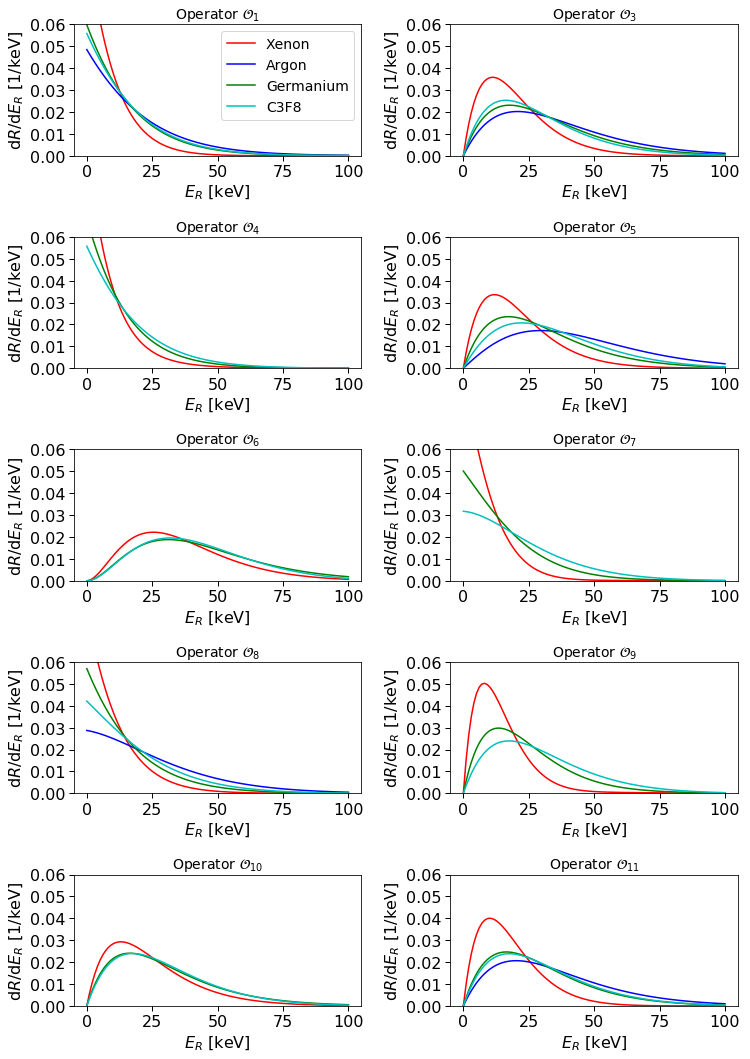

In [11]:
f,ax = pl.subplots(5,2,figsize=(10.7,15))


plotOperator(ax.flatten()[0],1, plotLegend=True)

for i,op in enumerate([3,4,5,6,7,8,9,10,11]):
    plotOperator(ax.flatten()[i+1],op)
    
pl.tight_layout()
pl.savefig("../plots/Spectra_mx=" + str(int(m_x))+ "GeV.pdf", bbox_inches="tight")
pl.show()